In [19]:
import numpy as np
#for linear algebra, working with array, matrix, numerical python
import pandas as pd
#for preprocessing, data manupulation, data structure
import seaborn as sns
#for plotting,
import matplotlib.pyplot as plt
#for plotting, visulization, GUI, api allows graph into GUI applications



In [20]:
df = pd.read_csv("Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [21]:
df.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [22]:
df.info()
#used to get consize summary of data frame, pandas function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 605.8+ KB


In [23]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [24]:
#type conversion from object to data type
df['date'] = pd.to_datetime(df["Date"])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 908.6+ KB


In [26]:
df.head()

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-05-01
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-01-02


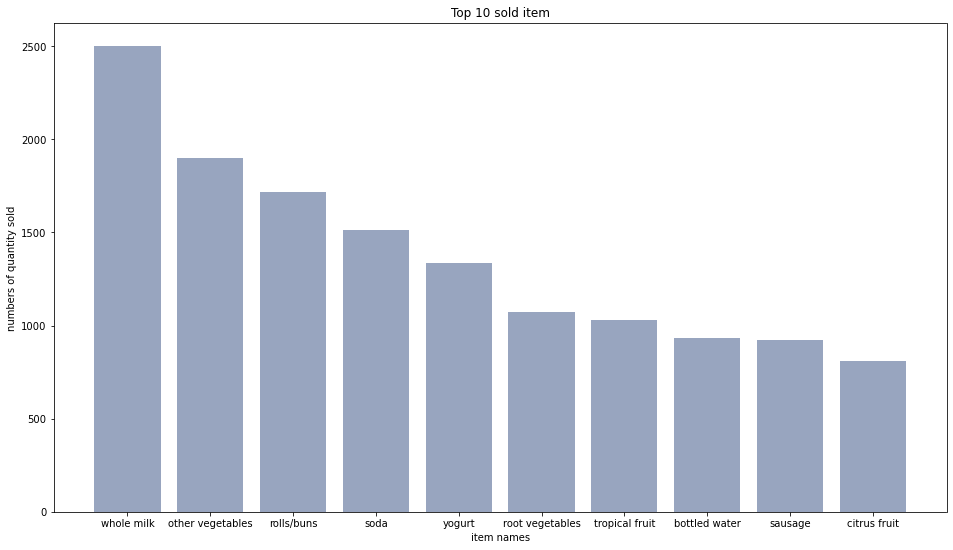

In [27]:
Item_distr = df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False).head(10)
bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))
plt.figure(figsize=(16,9))
plt.bar(x_pos,height,color=(0.2,0.3,0.5,0.5))
plt.title("Top 10 sold item")
plt.xlabel("item names")
plt.ylabel("numbers of quantity sold")
plt.xticks(x_pos,bars)
plt.show()

In [28]:
df_date = df.set_index(['Date'])
df_date

,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-05-01
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-01-02
...,...,...,...
08-10-2014,4471,sliced cheese,2014-08-10
23-02-2014,2022,candy,2014-02-23
16-04-2014,1097,cake bar,2014-04-16


In [ ]:
# df_date.resample("M")["itemDescription"].count().plot(figsize=(20,8) , grid=True , title='number').set(xlabel="date" , ylabel="number of item")

In [ ]:
# df_date.resample("M")["itemDescription"].count().plot(figsize = (20,8), grid=True, title='number of item sold by the month').set(xlabel="date",ylabel="number of item sold")


In [29]:
#modeling
cust_level = df[["Member_number", "itemDescription"]].sort_values(by="Member_number", ascending=False)
cust_level["itemDescription"] = cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [30]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]


In [81]:

from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.002,min_confidence=0.05, min_lift = 3, min_length = 2)

In [82]:
results = list(rules)
results


[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [91]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs,rhs,supports,confidences,lifts)) 
resultsindataframe = pd.DataFrame(inspect(results),columns = ['Left hand Side', 'Right hand side', 'Support', 'Confidence','Lift'])

In [93]:
# list['Lift'] = pd.to_numeric(list['Lift'])

# dataframe = yearly_returns.astype(float).nlargest(5, "year_"+str(2021))
# dataframe = yearly_returns.nlargest(5, "year_"+str(2021))


resultsindataframe.nlargest(n=20,columns="Lift")
# resultsindataframe.astype(float).nlargest(10, "Lift")

,Left hand Side,Right hand side,Support,Confidence,Lift
4915,berries,pork,0.002052,0.105263,14.654135
4914,berries,pork,0.002052,0.105263,12.068111
2674,beef,pork,0.002052,0.242424,11.524021
3573,citrus fruit,soda,0.002052,0.073394,11.443670
4133,long life bakery product,whole milk,0.002052,0.148148,11.105413
3290,oil,soda,0.002052,0.150943,10.322410
2904,bottled beer,misc. beverages,0.002309,0.097826,9.533152
5045,meat,pastry,0.002052,0.135593,9.438257
2902,bottled beer,pastry,0.002052,0.086957,9.415459
2734,berries,soda,0.002309,0.118421,9.232105
